In [3]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import tqdm
import numba_progress
import time
import numba
import scipy as sp
import DHT_functions_with_numba as DHT
import csv
import pandas as pd

In [8]:
def truthfulness(q, true_hypothesis):
    q_truth = q[:, :, :, true_hypothesis]
    T = np.mean(q_truth, axis=(0,2))
    return T

def cognitive_dissonance(q, p, true_hypothesis):
    C_agent = np.abs(q - p)
    C = np.mean(C_agent, axis=(0,2,3))
    return C

t = np.arange(1, 151)

          0         1
0  0.636972  0.297713
1  2.245228  0.339880
2  3.448618  0.388755
3  4.651639  0.439903
4  5.854383  0.492755
[0.29771336 0.33988045 0.38875487 0.43990264 0.49275543 0.54390321
 0.63536582 0.58482133 0.69734561 0.73769493 0.77832797 0.81753969
 0.85521644 0.90099287 0.94268367 0.97735529 0.99128221 0.99623211
 0.99906365 1.00044852 1.00028336 1.00073821 1.00072806 1.0007179
 1.00070775 1.00069759 1.00068744 1.00067728 1.00066713 1.00065697
 1.00064682 1.00032666 1.00062651 1.00061636 1.0006062  1.00059605
 1.00058589 1.00057574 1.00056558 1.00055543 1.00054528 1.00053512
 0.99984342]


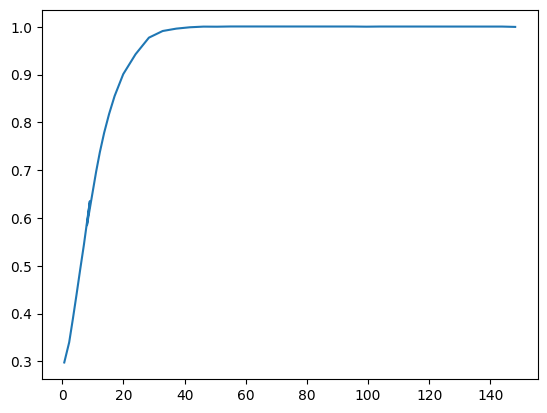

In [3]:
orig_data = pd.read_csv('orig_DHT_data.csv', header=None)
print(orig_data.head())
orig_T = orig_data.iloc[:, 1].values
print(orig_T)
orig_t = orig_data.iloc[:, 0].values
plt.figure()
plt.plot(orig_t, orig_T)
plt.show()

Text(0, 0.5, 'Truthfulness, $\\tau$')

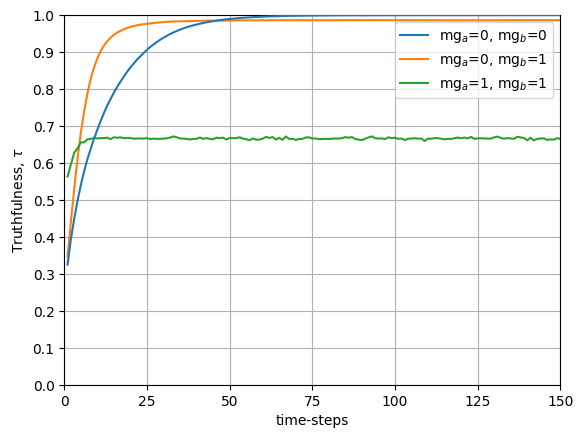

In [ ]:
beliefs_no_mega_node = np.load(r"C:\Users\audso\OneDrive\Dokumenter\GitHub\Project-thesis\reproduce_data\belief_histories_reproduce_k10_0mega_nodes.npz")
beliefs_2_mega_nodes = np.load(r"C:\Users\audso\OneDrive\Dokumenter\GitHub\Project-thesis\reproduce_data\belief_histories_reproduce_k10_2mega_nodes.npz")
# beliefs_consp_mega_node = np.load(r"")
beliefs_true_mega_node = np.load(r"C:\Users\audso\OneDrive\Dokumenter\GitHub\Project-thesis\reproduce_data\belief_histories_reproduce_k10_truemega_node.npz")

q_0 = beliefs_no_mega_node["private"]
p_0 = beliefs_no_mega_node["public"]
q_2 = beliefs_2_mega_nodes["private"]
p_2 = beliefs_2_mega_nodes["public"]
# q_consp = beliefs_consp_mega_node["private"]
# p_consp = beliefs_consp_mega_node["public"]
q_true = beliefs_true_mega_node["private"]
p_true = beliefs_true_mega_node["public"]

# T_0 = np.mean(q_0[0, :, :, 3], axis=1)
# T_2 = np.mean(q_2[0, :, :, 3], axis=1)
# T_consp = np.mean(q_consp[0, :, :, 3], axis=1)
# T_true = np.mean(q_true[0, :, :, 3], axis=1)
T_0 = truthfulness(q_0, 3)
T_2 = truthfulness(q_2, 3)
# T_consp = truthfulness(q_consp[1::], 3)
T_true = truthfulness(q_true[1::], 3)
t = np.arange(1, len(T_0))

plt.figure()
plt.plot(t, T_0[1::], label=r"mg$_a$=0, mg$_b$=0", zorder=5)
plt.plot(t, T_true[1::], label=r"mg$_a$=0, mg$_b$=1")
# plt.plot(t, T_consp[1::], label=r"mg$_a$=1, mg$_b$=0")
plt.plot(t, T_2[1::], label=r"mg$_a$=1, mg$_b$=1")
plt.grid()
plt.xlim(0, np.max(t))
plt.xticks(np.arange(0, np.max(t)+1, 25))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylim(0, 1)
plt.legend()
plt.xlabel("time-steps")
plt.ylabel(r"Truthfulness, $\tau$")

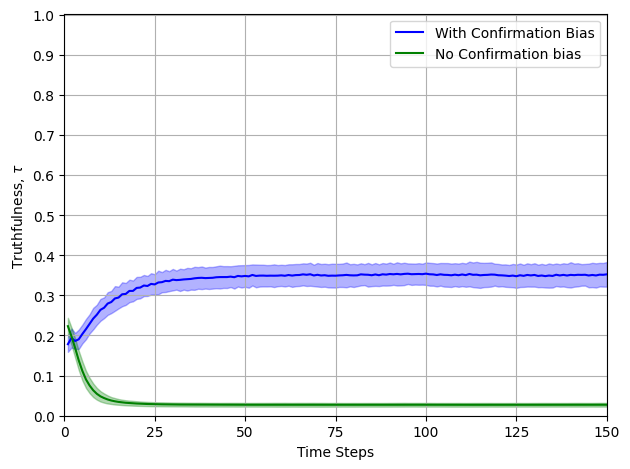

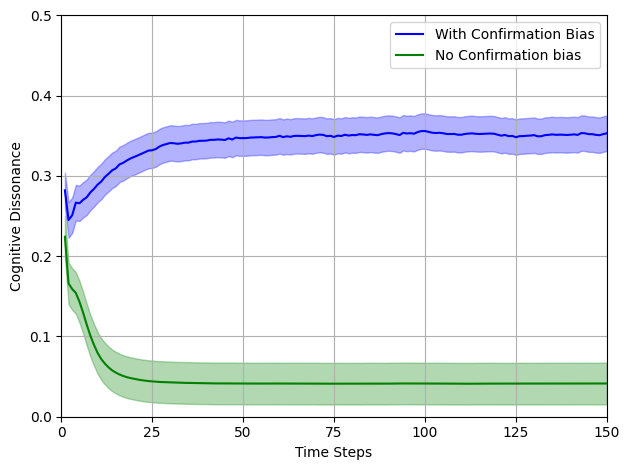

In [16]:
# --- Load and process first dataset ---
beliefs1 = np.load(r"DHT_k10_conspirators10_confirmation_bias_sigmoid4.npz")
q1 = beliefs1["private"]
p1 = beliefs1["public"]
true_hypothesis = q1.shape[3] - 1
q_truth1 = q1[:, :, :, true_hypothesis]
T_sim1 = np.mean(q_truth1, axis=2)
T1 = np.mean(T_sim1, axis=0)[1::]
T1_std = DHT.calculate_std(T_sim1)[1::]
C1 = cognitive_dissonance(q1, p1, true_hypothesis)[1::]
C1_std = DHT.calculate_std(C1)

# --- Load and process second dataset ---
beliefs2 = np.load("DHT_k10_conspirators10.npz")
q2 = beliefs2["private"]
p2 = beliefs2["public"]
q_truth2 = q2[:, :, :, true_hypothesis]
T_sim2 = np.mean(q_truth2, axis=2)
T2 = np.mean(T_sim2, axis=0)[1::]
T2_std = DHT.calculate_std(T_sim2)[1::]
C2 = cognitive_dissonance(q2, p2, true_hypothesis)[1::]
C2_std = DHT.calculate_std(C2)

# --- Set up time axis ---
num_iter = q1.shape[1]
t = np.arange(1, num_iter)

# --- Plot truthfulness comparison ---
plt.figure()
plt.plot(t, T1, label="With Confirmation Bias", zorder=5, color="blue")
plt.fill_between(t, T1 - T1_std, T1 + T1_std, alpha=0.3, color="blue")

plt.plot(t, T2, label="No Confirmation bias", zorder=5, color="green")
plt.fill_between(t, T2 - T2_std, T2 + T2_std, alpha=0.3, color="green")

plt.grid()
plt.xlim(0, np.max(t))
plt.xticks(np.arange(0, np.max(t) + 1, 25))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylim(0, 1.002)
plt.legend()
plt.xlabel("Time Steps")
plt.ylabel(r"Truthfulness, $\tau$")
plt.tight_layout()
plt.show()

# --- Plot cognitive dissonance comparison ---
plt.figure()
plt.plot(t, C1, label="With Confirmation Bias", zorder=5, color="blue")
plt.fill_between(t, C1 - C1_std, C1 + C1_std, alpha=0.3, color="blue")

plt.plot(t, C2, label="No Confirmation bias", zorder=5, color="green")
plt.fill_between(t, C2 - C2_std, C2 + C2_std, alpha=0.3, color="green")

plt.grid()
plt.xlim(0, np.max(t))
plt.xticks(np.arange(0, np.max(t) + 1, 25))
plt.ylim(0, 0.5)
plt.legend()
plt.xlabel("Time Steps")
plt.ylabel("Cognitive Dissonance")
plt.tight_layout()
plt.show()


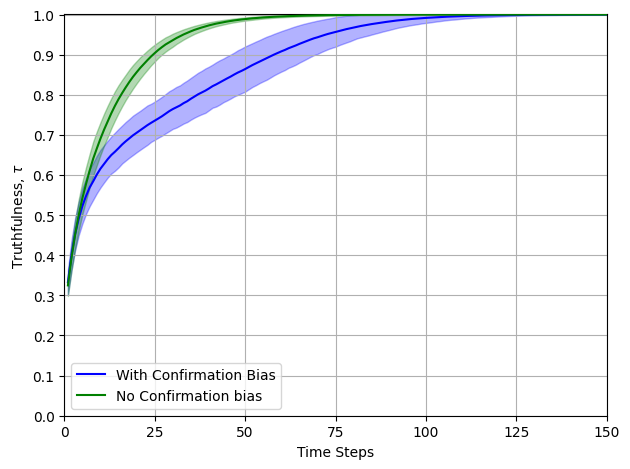

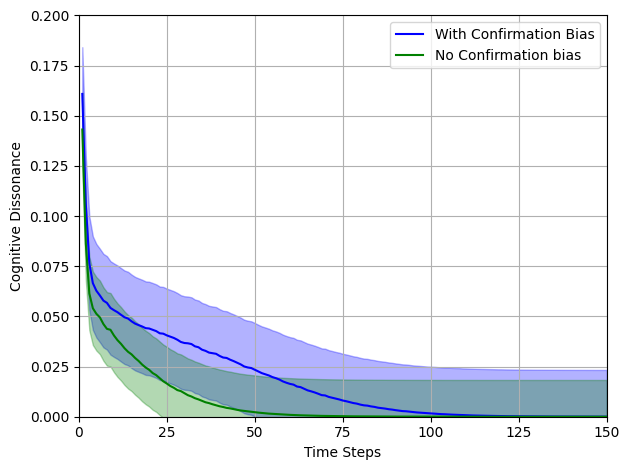

In [17]:
# --- Load and process first dataset ---
beliefs1 = np.load(r"DHT_with_confirmation_bias_k10_ER_sigmoid4.npz")
q1 = beliefs1["private"]
p1 = beliefs1["public"]
true_hypothesis = q1.shape[3] - 1
q_truth1 = q1[:, :, :, true_hypothesis]
T_sim1 = np.mean(q_truth1, axis=2)
T1 = np.mean(T_sim1, axis=0)[1::]
T1_std = DHT.calculate_std(T_sim1)[1::]
C1 = cognitive_dissonance(q1, p1, true_hypothesis)[1::]
C1_std = DHT.calculate_std(C1)

# --- Load and process second dataset ---
beliefs2 = np.load("basic_DHT_k10.npz")
q2 = beliefs2["private"]
p2 = beliefs2["public"]
q_truth2 = q2[:, :, :, true_hypothesis]
T_sim2 = np.mean(q_truth2, axis=2)
T2 = np.mean(T_sim2, axis=0)[1::]
T2_std = DHT.calculate_std(T_sim2)[1::]
C2 = cognitive_dissonance(q2, p2, true_hypothesis)[1::]
C2_std = DHT.calculate_std(C2)

# --- Set up time axis ---
num_iter = q1.shape[1]
t = np.arange(1, num_iter)

# --- Plot truthfulness comparison ---
plt.figure()
plt.plot(t, T1, label="With Confirmation Bias", zorder=5, color="blue")
plt.fill_between(t, T1 - T1_std, T1 + T1_std, alpha=0.3, color="blue")

plt.plot(t, T2, label="No Confirmation bias", zorder=5, color="green")
plt.fill_between(t, T2 - T2_std, T2 + T2_std, alpha=0.3, color="green")

plt.grid()
plt.xlim(0, np.max(t))
plt.xticks(np.arange(0, np.max(t) + 1, 25))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylim(0, 1.002)
plt.legend()
plt.xlabel("Time Steps")
plt.ylabel(r"Truthfulness, $\tau$")
plt.tight_layout()
plt.show()

# --- Plot cognitive dissonance comparison ---
plt.figure()
plt.plot(t, C1, label="With Confirmation Bias", zorder=5, color="blue")
plt.fill_between(t, C1 - C1_std, C1 + C1_std, alpha=0.3, color="blue")

plt.plot(t, C2, label="No Confirmation bias", zorder=5, color="green")
plt.fill_between(t, C2 - C2_std, C2 + C2_std, alpha=0.3, color="green")

plt.grid()
plt.xlim(0, np.max(t))
plt.xticks(np.arange(0, np.max(t) + 1, 25))
plt.ylim(0, 0.2)
plt.legend()
plt.xlabel("Time Steps")
plt.ylabel("Cognitive Dissonance")
plt.tight_layout()
plt.show()


0.9998335392960226


Text(0, 0.5, 'Cognitive Dissonance, $C$')

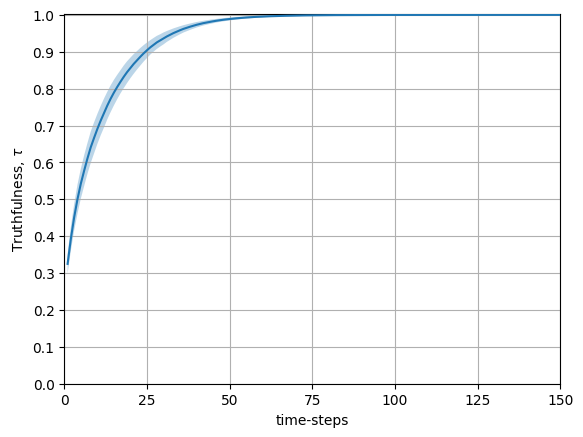

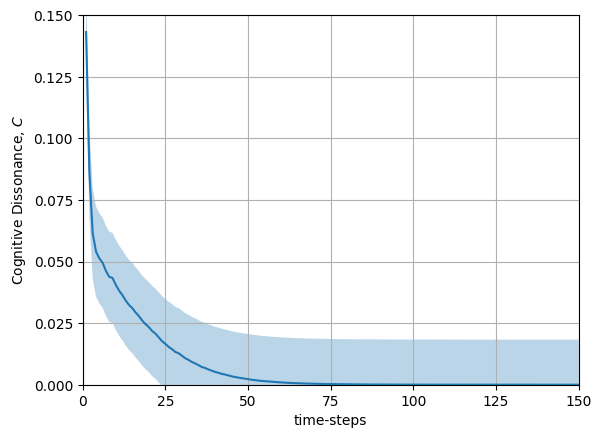

In [27]:
beliefs = np.load("basic_DHT_k10.npz")
q = beliefs["private"]
p = beliefs["public"]
num_sim = q.shape[0]
num_iter = q.shape[1]
N = q.shape[2]
M = q.shape[3]
true_hypothesis = M-1
q_truth = q[:, :, :, true_hypothesis]
T_simulations = np.mean(q_truth, axis=2)
T = np.mean(T_simulations, axis=0)[1::]
T_std = DHT.calculate_std(T_simulations)[1::]
C = cognitive_dissonance(q, p, true_hypothesis)[1::]
C_std = DHT.calculate_std(C)
# T = np.mean(q[0, :, :, 3], axis=1)
# T = truthfulness(q, true_hypothesis)

# print(T)
print(T[100])

plt.figure()
plt.plot(t, T, label=r"mean", zorder=5)
plt.fill_between(t, T-T_std, T+T_std, label=r"std", alpha=0.3)
plt.grid()
plt.xlim(0, np.max(t))
plt.xticks(np.arange(0, np.max(t)+1, 25))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylim(0, 1.002)
# plt.legend()
plt.xlabel("time-steps")
plt.ylabel(r"Truthfulness, $\tau$")

plt.figure()
plt.plot(t, C, label=r"mean", zorder=5)
plt.fill_between(t, C-C_std, C+C_std, label=r"std", alpha=0.3)
plt.grid()
plt.xlim(0, np.max(t))
plt.xticks(np.arange(0, np.max(t)+1, 25))
plt.yticks(np.arange(0, 0.225, 0.025))
plt.ylim(0, 0.15)
# plt.legend()
plt.xlabel("time-steps")
plt.ylabel(r"Cognitive Dissonance, $C$")

0.38861025451580744


Text(0, 0.5, 'Cognitive Dissonance, $C$')

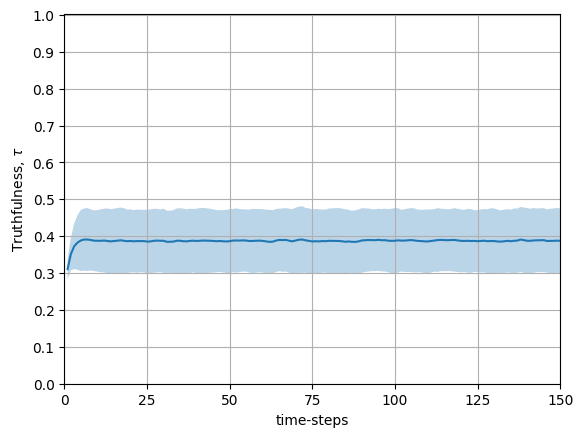

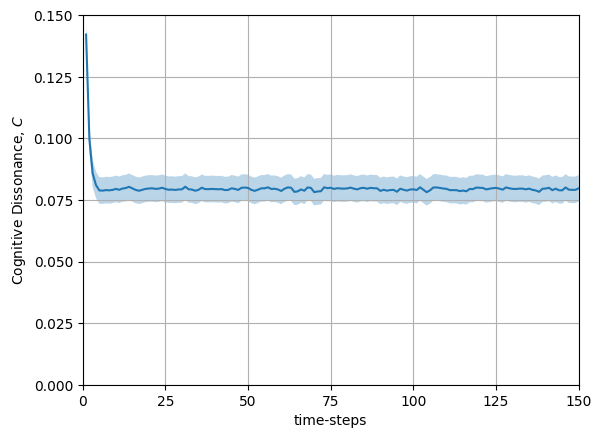

In [29]:
beliefs = np.load("DHT_k10_BA_directed.npz")
q = beliefs["private"]
p = beliefs["public"]
num_sim = q.shape[0]
num_iter = q.shape[1]
N = q.shape[2]
M = q.shape[3]
true_hypothesis = M-1
q_truth = q[:, :, :, true_hypothesis]
T_simulations = np.mean(q_truth, axis=2)
T = np.mean(T_simulations, axis=0)[1::]
T_std = DHT.calculate_std(T_simulations)[1::]
C = cognitive_dissonance(q, p, true_hypothesis)[1::]
C_std = DHT.calculate_std(C)
# T = np.mean(q[0, :, :, 3], axis=1)
# T = truthfulness(q, true_hypothesis)

# print(T)
print(T[100])

plt.figure()
plt.plot(t, T, label=r"mean", zorder=5)
plt.fill_between(t, T-T_std, T+T_std, label=r"std", alpha=0.3)
plt.grid()
plt.xlim(0, np.max(t))
plt.xticks(np.arange(0, np.max(t)+1, 25))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylim(0, 1.002)
# plt.legend()
plt.xlabel("time-steps")
plt.ylabel(r"Truthfulness, $\tau$")

plt.figure()
plt.plot(t, C, label=r"mean", zorder=5)
plt.fill_between(t, C-C_std, C+C_std, label=r"std", alpha=0.3)
plt.grid()
plt.xlim(0, np.max(t))
plt.xticks(np.arange(0, np.max(t)+1, 25))
plt.yticks(np.arange(0, 0.225, 0.025))
plt.ylim(0, 0.15)
# plt.legend()
plt.xlabel("time-steps")
plt.ylabel(r"Cognitive Dissonance, $C$")

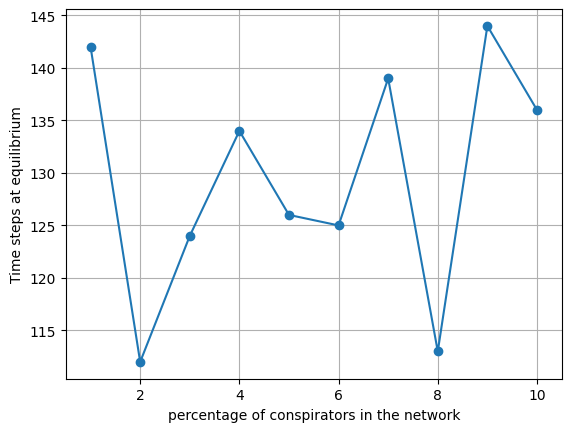

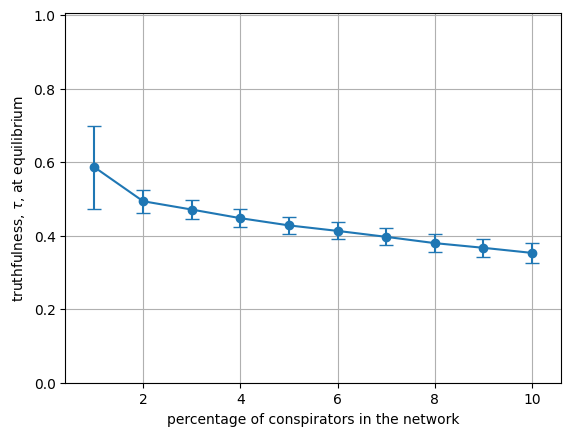

In [ ]:
num_conspirators_arr = range(1, 11, 1)  # or whatever range of k values you want
convergence_indices = np.array([])
T_avg = np.array([])
T_avg_std = np.array([])
C_at_equilibrium = np.array([])
C_at_equilibrium_std = np.array([])

for num_conspirators in num_conspirators_arr:
    file_path = f"DHT_k10_conspirators{num_conspirators/100}_confirmation_bias_sigmoid4.npz"
    beliefs = np.load(file_path)
    q = beliefs["private"]
    p = beliefs["public"]

    num_sim = q.shape[0]
    num_iter = q.shape[1]
    N = q.shape[2]
    M = q.shape[3]

    true_hypothesis = M - 1
    q_truth = q[:, :, :, true_hypothesis]
    T_simulations = np.mean(q_truth, axis=2)
    T = np.mean(T_simulations, axis=0)[1:]
    T_std = DHT.calculate_std(T_simulations)[1:]

    C_agents = np.mean(np.mean(np.abs(q-p), axis=3), axis=2)
    C = cognitive_dissonance(q, p, true_hypothesis)[1:]
    C_std = DHT.calculate_std(C_agents)

    above_threshold = np.where(T > 0.999)[0]
    if above_threshold.size > 0:
        idx = above_threshold[0]
    else:
        idx = np.argmax(T)
        # print(f"For k={m}, T does not exceed 0.999. Max value at index {idx}: {T[idx]:.3f}")

    tail_length = 50
    avg_last_T = np.mean(T[-tail_length:])
    avg_last_T_std = np.mean(T_std[-tail_length:])
    avg_last_C = np.mean(C[-tail_length:])
    avg_last_C_std = np.mean(C_std[-tail_length:])

    convergence_indices = np.append(convergence_indices, idx)
    T_avg = np.append(T_avg, avg_last_T)
    T_avg_std = np.append(T_avg_std, avg_last_T_std)
    C_at_equilibrium = np.append(C_at_equilibrium, avg_last_C)
    C_at_equilibrium_std = np.append(C_at_equilibrium_std, avg_last_C_std)

plt.figure()
plt.plot(num_conspirators_arr, convergence_indices, marker='o')
plt.xlabel(r"percentage of conspirators in the network")
plt.ylabel("Time steps at equilibrium")
plt.xlim(0.5, len(num_conspirators_arr)+0.5)
plt.xticks(num_conspirators_arr[1::2])
plt.grid(True)
plt.show()

plt.figure()
plt.errorbar(num_conspirators_arr, T_avg, yerr=T_avg_std, marker='o', capsize=5)
plt.xlabel(r"percentage of conspirators in the network")
plt.ylabel(r"truthfulness, $\tau$, at equilibrium")
plt.grid(True)
plt.xlim(num_conspirators_arr[0]-0.6, num_conspirators_arr[-1]+0.6)
plt.ylim(0, 1.005)
plt.xticks(num_conspirators_arr[1::2])
plt.yticks(np.arange(0, 1.2, 0.2))
plt.show()

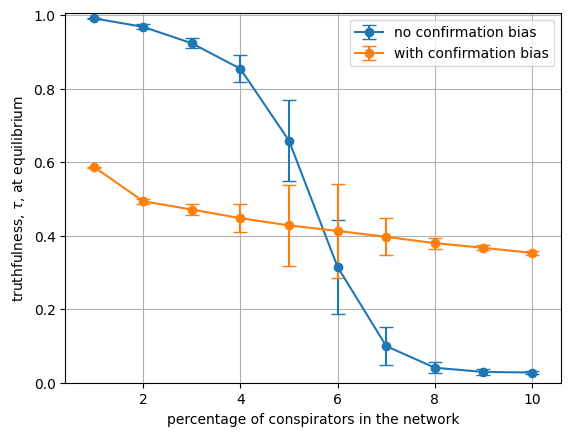

In [25]:
num_conspirators_arr = range(1, 11, 1) 
T_avg1 = np.array([])
T_avg_std1 = np.array([])
T_avg2 = np.array([])
T_avg_std2 = np.array([])

for num_conspirators in num_conspirators_arr:
    file_path1 = f"DHT_k10_conspirators{num_conspirators/100}.npz"
    beliefs1 = np.load(file_path1)
    q1 = beliefs1["private"]

    file_path2 = f"DHT_k10_conspirators{num_conspirators/100}_confirmation_bias_sigmoid4.npz"
    beliefs2 = np.load(file_path2)
    q2 = beliefs2["private"]

    num_sim = q1.shape[0]
    num_iter = q1.shape[1]
    N = q1.shape[2]
    M = q1.shape[3]

    true_hypothesis = M - 1
    q_truth1 = q1[:, :, :, true_hypothesis]
    T_simulations1 = np.mean(q_truth1, axis=2)
    T1 = np.mean(T_simulations1, axis=0)[1:]
    T_std1 = DHT.calculate_std(T_simulations1)[1:]

    q_truth1 = q2[:, :, :, true_hypothesis]
    T_simulations2 = np.mean(q_truth1, axis=2)
    T2 = np.mean(T_simulations2, axis=0)[1:]
    T_std2 = DHT.calculate_std(T_simulations2)[1:]

    tail_length = 50

    avg_last_T1 = np.mean(T1[-tail_length:])
    avg_last_T_std1 = np.mean(T_std1[-tail_length:])
    T_avg1 = np.append(T_avg1, avg_last_T1)
    T_avg_std1 = np.append(T_avg_std1, avg_last_T_std1)

    avg_last_T2 = np.mean(T2[-tail_length:])
    avg_last_T_std2 = np.mean(T_std1[-tail_length:])
    T_avg2 = np.append(T_avg2, avg_last_T2)
    T_avg_std2 = np.append(T_avg_std2, avg_last_T_std2)

# --- Set up time axis ---
num_iter = q1.shape[1]

plt.figure()
plt.errorbar(num_conspirators_arr, T_avg1, yerr=T_avg_std1, marker='o', capsize=5, label="no confirmation bias")
plt.errorbar(num_conspirators_arr, T_avg2, yerr=T_avg_std2, marker='o', capsize=5, label="with confirmation bias")
plt.xlabel(r"percentage of conspirators in the network")
plt.ylabel(r"truthfulness, $\tau$, at equilibrium")
plt.grid(True)
plt.xlim(num_conspirators_arr[0]-0.6, num_conspirators_arr[-1]+0.6)
plt.ylim(0, 1.005)
plt.xticks(num_conspirators_arr[1::2])
plt.yticks(np.arange(0, 1.2, 0.2))
plt.legend()
plt.show()

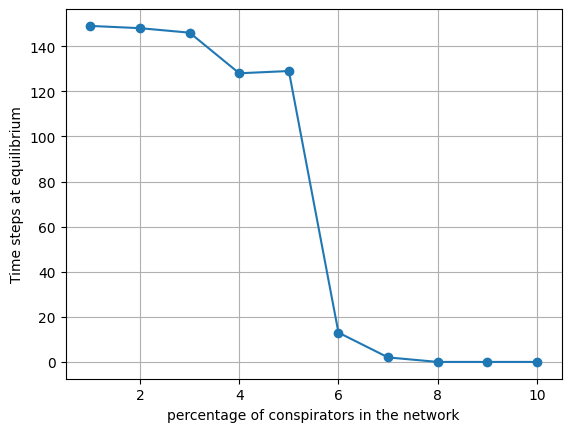

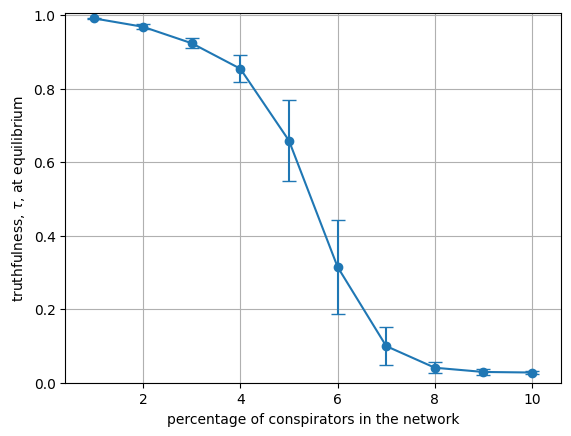

In [22]:
num_conspirators_arr = range(1, 11, 1)  # or whatever range of k values you want
convergence_indices = np.array([])
T_avg = np.array([])
T_avg_std = np.array([])
C_at_equilibrium = np.array([])
C_at_equilibrium_std = np.array([])

for num_conspirators in num_conspirators_arr:
    file_path = f"DHT_k10_conspirators{num_conspirators/100}.npz"
    beliefs = np.load(file_path)
    q = beliefs["private"]
    p = beliefs["public"]

    num_sim = q.shape[0]
    num_iter = q.shape[1]
    N = q.shape[2]
    M = q.shape[3]

    true_hypothesis = M - 1
    q_truth = q[:, :, :, true_hypothesis]
    T_simulations = np.mean(q_truth, axis=2)
    T = np.mean(T_simulations, axis=0)[1:]
    T_std = DHT.calculate_std(T_simulations)[1:]

    C_agents = np.mean(np.mean(np.abs(q-p), axis=3), axis=2)
    C = cognitive_dissonance(q, p, true_hypothesis)[1:]
    C_std = DHT.calculate_std(C_agents)

    above_threshold = np.where(T > 0.999)[0]
    if above_threshold.size > 0:
        idx = above_threshold[0]
    else:
        idx = np.argmax(T)
        # print(f"For k={m}, T does not exceed 0.999. Max value at index {idx}: {T[idx]:.3f}")

    tail_length = 50
    avg_last_T = np.mean(T[-tail_length:])
    avg_last_T_std = np.mean(T_std[-tail_length:])
    avg_last_C = np.mean(C[-tail_length:])
    avg_last_C_std = np.mean(C_std[-tail_length:])

    convergence_indices = np.append(convergence_indices, idx)
    T_avg = np.append(T_avg, avg_last_T)
    T_avg_std = np.append(T_avg_std, avg_last_T_std)
    C_at_equilibrium = np.append(C_at_equilibrium, avg_last_C)
    C_at_equilibrium_std = np.append(C_at_equilibrium_std, avg_last_C_std)

plt.figure()
plt.plot(num_conspirators_arr, convergence_indices, marker='o')
plt.xlabel(r"percentage of conspirators in the network")
plt.ylabel("Time steps at equilibrium")
plt.xlim(0.5, len(num_conspirators_arr)+0.5)
plt.xticks(num_conspirators_arr[1::2])
plt.grid(True)
plt.show()

plt.figure()
plt.errorbar(num_conspirators_arr, T_avg, yerr=T_avg_std, marker='o', capsize=5)
plt.xlabel(r"percentage of conspirators in the network")
plt.ylabel(r"truthfulness, $\tau$, at equilibrium")
plt.grid(True)
plt.xlim(num_conspirators_arr[0]-0.6, num_conspirators_arr[-1]+0.6)
plt.ylim(0, 1.005)
plt.xticks(num_conspirators_arr[1::2])
plt.yticks(np.arange(0, 1.2, 0.2))
plt.show()

For k=1, T does not exceed 0.999. Max value at index 119: 0.367
For k=2, T does not exceed 0.999. Max value at index 138: 0.575
For k=3, T does not exceed 0.999. Max value at index 143: 0.829
For k=4, T does not exceed 0.999. Max value at index 149: 0.960
For k=5, T does not exceed 0.999. Max value at index 137: 0.988
For k=6, T does not exceed 0.999. Max value at index 146: 0.998


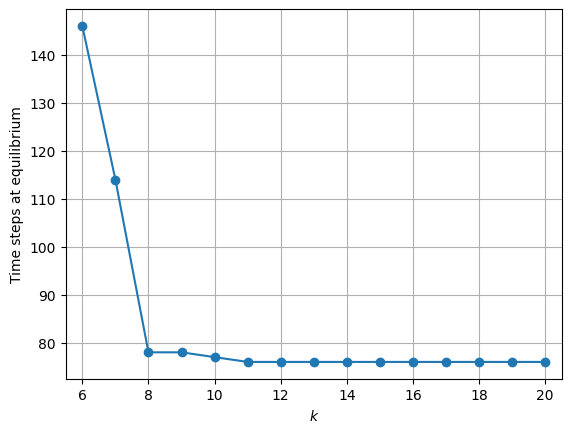

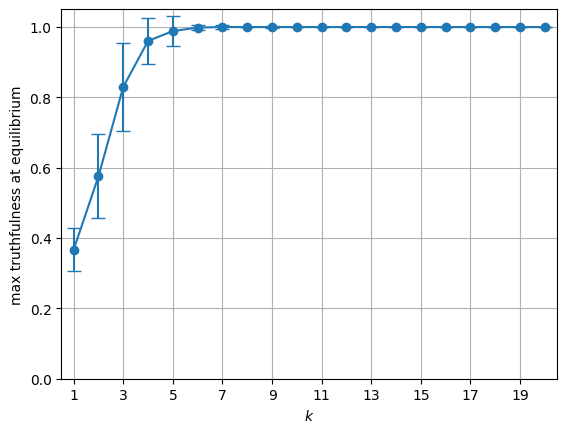

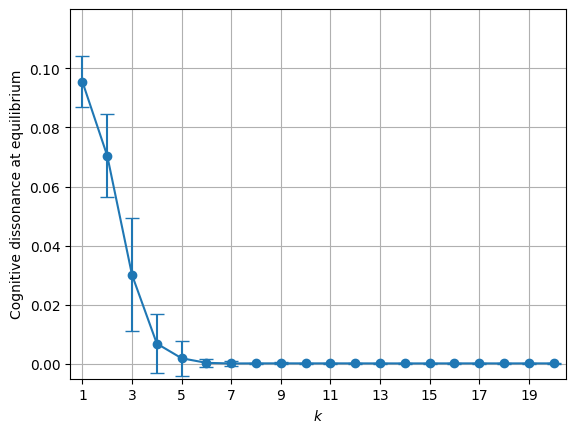

In [101]:
ks = range(1, 21)  # or whatever range of k values you want
convergence_indices = np.array([])
T_max_values = np.array([])
T_max_values_std = np.array([])
C_at_equilibrium = np.array([])
C_at_equilibrium_std = np.array([])

for k in ks:
    file_path = f"basic_DHT_k{k}.npz"
    beliefs = np.load(file_path)
    q = beliefs["private"]
    p = beliefs["public"]

    num_sim = q.shape[0]
    num_iter = q.shape[1]
    N = q.shape[2]
    M = q.shape[3]

    true_hypothesis = M - 1
    q_truth = q[:, :, :, true_hypothesis]
    T_simulations = np.mean(q_truth, axis=2)
    T = np.mean(T_simulations, axis=0)[1:]
    T_std = DHT.calculate_std(T_simulations)[1:]

    C_agents = np.mean(np.mean(np.abs(q-p), axis=3), axis=2)
    C = cognitive_dissonance(q, p, true_hypothesis)[1:]
    C_std = DHT.calculate_std(C_agents)

    above_threshold = np.where(T > 0.999)[0]
    if above_threshold.size > 0:
        idx = above_threshold[0]
    else:
        idx = np.argmax(T)
        print(f"For k={k}, T does not exceed 0.999. Max value at index {idx}: {T[idx]:.3f}")

    convergence_indices = np.append(convergence_indices, idx)
    T_max_values = np.append(T_max_values, T[idx])
    T_max_values_std = np.append(T_max_values_std, T_std[idx])
    C_at_equilibrium = np.append(C_at_equilibrium, C[idx])
    C_at_equilibrium_std = np.append(C_at_equilibrium_std, C_std[idx])

plt.figure()
plt.plot(ks[5:], convergence_indices[5:], marker='o')
plt.xlabel(r"$k$")
plt.ylabel("Time steps at equilibrium")
plt.xlim(5.5, 20.5)
plt.xticks(np.arange(6, 21, 2))
plt.grid(True)
plt.show()

plt.figure()
plt.errorbar(ks, T_max_values, yerr=T_max_values_std, marker='o', capsize=5)
plt.xlabel(r"$k$")
plt.ylabel("max truthfulness at equilibrium")
plt.grid(True)
plt.xlim(0.5, 20.5)
plt.ylim(0, 1.05)
plt.xticks(np.arange(1, 21, 2))
plt.yticks(np.arange(0, 1.2, 0.2))
plt.show()

plt.figure()
plt.errorbar(ks, C_at_equilibrium, yerr=C_at_equilibrium_std, marker='o', capsize=5)
plt.xlabel(r"$k$")
plt.ylabel("Cognitive dissonance at equilibrium")
plt.grid(True)
plt.xlim(0.5, 20.5)
plt.ylim(-0.005, 0.12)
plt.xticks(np.arange(1, 21, 2))
plt.yticks(np.arange(0, 0.12, 0.02))
plt.show()

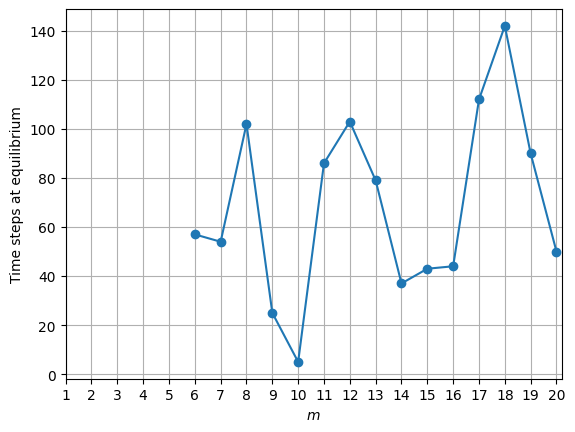

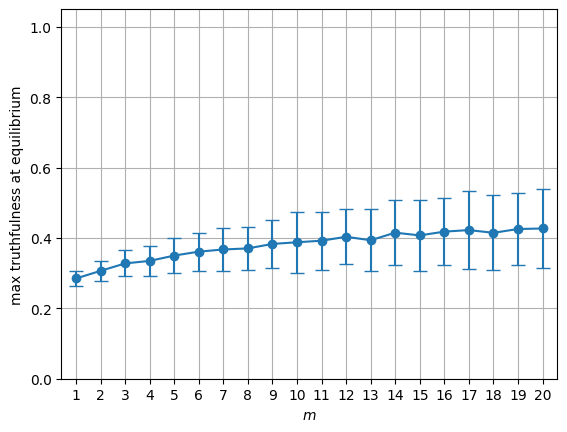

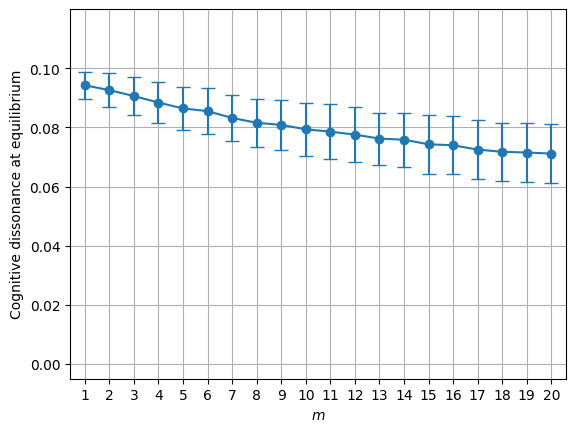

In [185]:
# ms = np.array([1])
# ms = np.append(ms, np.arange(5, 100, 5))
# ms = np.append(ms, 99)
ms = np.arange(1, 21)
convergence_indices = np.array([])
T_avg = np.array([])
T_avg_std = np.array([])
C_at_equilibrium = np.array([])
C_at_equilibrium_std = np.array([])

for m in ms:
    file_path = f"DHT_k{m}_BA_directed.npz"
    beliefs = np.load(file_path)
    q = beliefs["private"]
    p = beliefs["public"]

    num_sim = q.shape[0]
    num_iter = q.shape[1]
    N = q.shape[2]
    M = q.shape[3]

    true_hypothesis = M - 1
    q_truth = q[:, :, :, true_hypothesis]
    T_simulations = np.mean(q_truth, axis=2)
    T = np.mean(T_simulations, axis=0)[1:]
    T_std = DHT.calculate_std(T_simulations)[1:]

    C_agents = np.mean(np.mean(np.abs(q-p), axis=3), axis=2)
    C = cognitive_dissonance(q, p, true_hypothesis)[1:]
    C_std = DHT.calculate_std(C_agents)

    above_threshold = np.where(T > 0.999)[0]
    if above_threshold.size > 0:
        idx = above_threshold[0]
    else:
        idx = np.argmax(T)
        # print(f"For k={m}, T does not exceed 0.999. Max value at index {idx}: {T[idx]:.3f}")

    tail_length = 100
    avg_last_T = np.mean(T[-tail_length:])
    avg_last_T_std = np.mean(T_std[-tail_length:])
    avg_last_C = np.mean(C[-tail_length:])
    avg_last_C_std = np.mean(C_std[-tail_length:])

    convergence_indices = np.append(convergence_indices, idx)
    T_avg = np.append(T_avg, avg_last_T)
    T_avg_std = np.append(T_avg_std, avg_last_T_std)
    C_at_equilibrium = np.append(C_at_equilibrium, avg_last_C)
    C_at_equilibrium_std = np.append(C_at_equilibrium_std, avg_last_C_std)

plt.figure()
plt.plot(ms[5:], convergence_indices[5:], marker='o')
plt.xlabel(r"$m$")
plt.ylabel("Time steps at equilibrium")
plt.xlim(5.8, len(ms)+0.2)
plt.xticks(ms)
plt.grid(True)
plt.show()

plt.figure()
plt.errorbar(ms, T_avg, yerr=T_avg_std, marker='o', capsize=5)
plt.xlabel(r"$m$")
plt.ylabel("max truthfulness at equilibrium")
plt.grid(True)
plt.xlim(ms[0]-0.6, ms[-1]+0.6)
plt.ylim(0, 1.05)
plt.xticks(ms)
plt.yticks(np.arange(0, 1.2, 0.2))
plt.show()

plt.figure()
plt.errorbar(ms, C_at_equilibrium, yerr=C_at_equilibrium_std, marker='o', capsize=5)
plt.xlabel(r"$m$")
plt.ylabel("Cognitive dissonance at equilibrium")
plt.grid(True)
plt.xlim(ms[0]-0.6, ms[-1]+0.6)
plt.ylim(-0.005, 0.12)
plt.xticks(ms)
plt.yticks(np.arange(0, 0.12, 0.02))
plt.show()

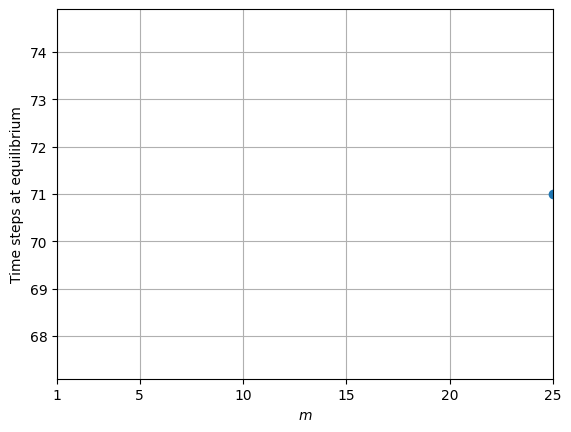

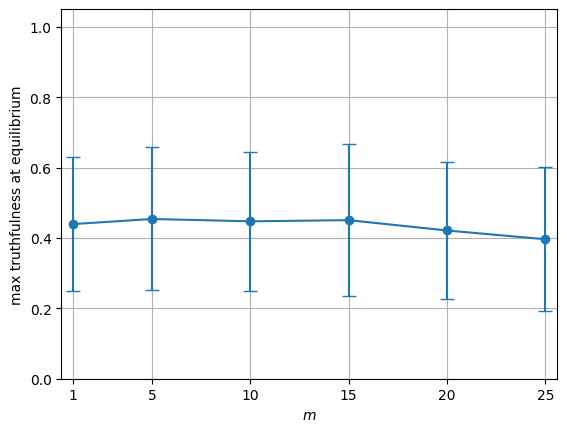

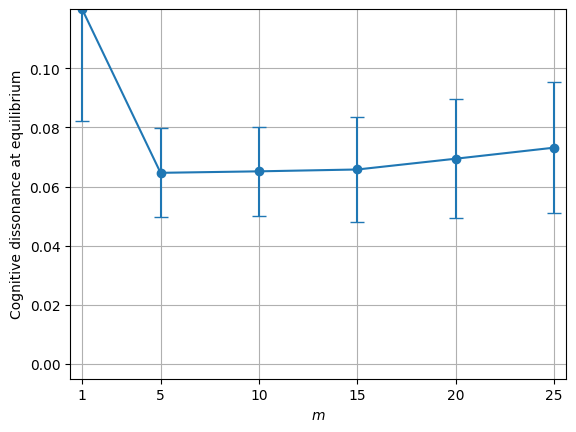

In [102]:
ms = np.array([1])
ms = np.append(ms, np.arange(5, 30, 5))
# ms = np.append(ms, 99)
convergence_indices = np.array([])
T_avg = np.array([])
T_avg_std = np.array([])
C_at_equilibrium = np.array([])
C_at_equilibrium_std = np.array([])

for m in ms:
    file_path = f"basic_DHT_k{m}_BA_directed_alt1.npz"
    beliefs = np.load(file_path)
    q = beliefs["private"]
    p = beliefs["public"]

    num_sim = q.shape[0]
    num_iter = q.shape[1]
    N = q.shape[2]
    M = q.shape[3]

    true_hypothesis = M - 1
    q_truth = q[:, :, :, true_hypothesis]
    T_simulations = np.mean(q_truth, axis=2)
    T = np.mean(T_simulations, axis=0)[1:]
    T_std = DHT.calculate_std(T_simulations)[1:]

    C_agents = np.mean(np.mean(np.abs(q-p), axis=3), axis=2)
    C = cognitive_dissonance(q, p, true_hypothesis)[1:]
    C_std = DHT.calculate_std(C_agents)

    above_threshold = np.where(T > 0.999)[0]
    if above_threshold.size > 0:
        idx = above_threshold[0]
    else:
        idx = np.argmax(T)
        # print(f"For k={m}, T does not exceed 0.999. Max value at index {idx}: {T[idx]:.3f}")

    tail_length = 100
    avg_last_T = np.mean(T[-tail_length:])
    avg_last_T_std = np.mean(T_std[-tail_length:])
    avg_last_C = np.mean(C[-tail_length:])
    avg_last_C_std = np.mean(C_std[-tail_length:])

    convergence_indices = np.append(convergence_indices, idx)
    T_avg = np.append(T_avg, avg_last_T)
    T_avg_std = np.append(T_avg_std, avg_last_T_std)
    C_at_equilibrium = np.append(C_at_equilibrium, avg_last_C)
    C_at_equilibrium_std = np.append(C_at_equilibrium_std, avg_last_C_std)

plt.figure()
plt.plot(ms[5:], convergence_indices[5:], marker='o')
plt.xlabel(r"$m$")
plt.ylabel("Time steps at equilibrium")
plt.xlim(5.8, len(ms)+0.2)
plt.xticks(ms)
plt.grid(True)
plt.show()

plt.figure()
plt.errorbar(ms, T_avg, yerr=T_avg_std, marker='o', capsize=5)
plt.xlabel(r"$m$")
plt.ylabel("max truthfulness at equilibrium")
plt.grid(True)
plt.xlim(ms[0]-0.6, ms[-1]+0.6)
plt.ylim(0, 1.05)
plt.xticks(ms)
plt.yticks(np.arange(0, 1.2, 0.2))
plt.show()

plt.figure()
plt.errorbar(ms, C_at_equilibrium, yerr=C_at_equilibrium_std, marker='o', capsize=5)
plt.xlabel(r"$m$")
plt.ylabel("Cognitive dissonance at equilibrium")
plt.grid(True)
plt.xlim(ms[0]-0.6, ms[-1]+0.6)
plt.ylim(-0.005, 0.12)
plt.xticks(ms)
plt.yticks(np.arange(0, 0.12, 0.02))
plt.show()

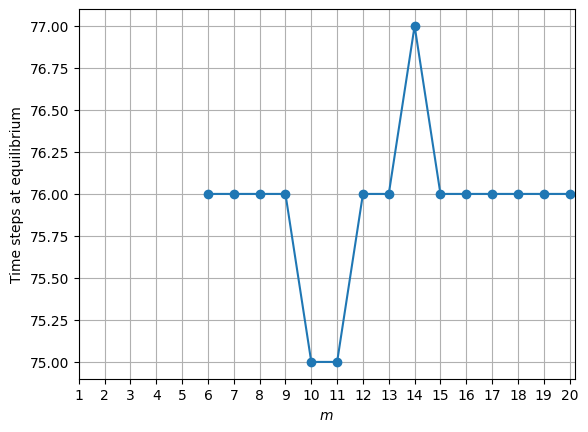

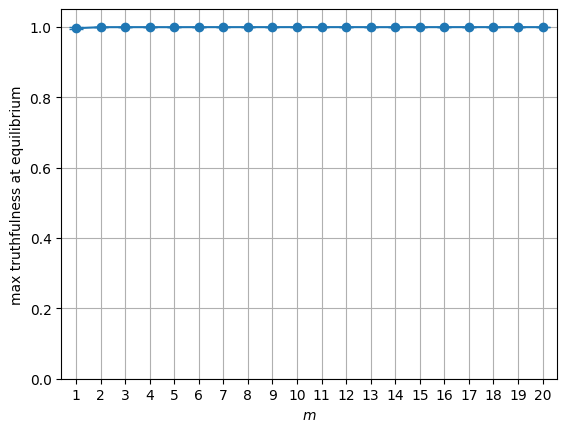

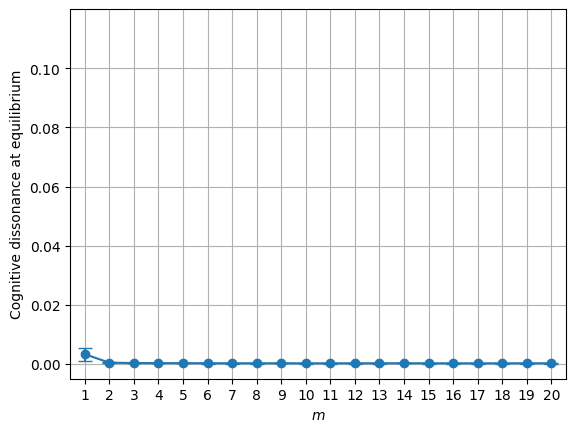

In [ ]:
# ms = np.array([1])
# ms = np.append(ms, np.arange(5, 100, 5))
# ms = np.append(ms, 99)
ms = np.arange(1,21)
convergence_indices = np.array([])
T_avg = np.array([])
T_avg_std = np.array([])
C_at_equilibrium = np.array([])
C_at_equilibrium_std = np.array([])

for m in ms:
    file_path = f"basic_DHT_k{m}_BA_undirected.npz"
    beliefs = np.load(file_path)
    q = beliefs["private"]
    p = beliefs["public"]

    num_sim = q.shape[0]
    num_iter = q.shape[1]
    N = q.shape[2]
    M = q.shape[3]

    true_hypothesis = M - 1
    q_truth = q[:, :, :, true_hypothesis]
    T_simulations = np.mean(q_truth, axis=2)
    T = np.mean(T_simulations, axis=0)[1:]
    T_std = DHT.calculate_std(T_simulations)[1:]

    C_agents = np.mean(np.mean(np.abs(q-p), axis=3), axis=2)
    C = cognitive_dissonance(q, p, true_hypothesis)[1:]
    C_std = DHT.calculate_std(C_agents)

    above_threshold = np.where(T > 0.999)[0]
    if above_threshold.size > 0:
        idx = above_threshold[0]
    else:
        idx = np.argmax(T)
        # print(f"For k={m}, T does not exceed 0.999. Max value at index {idx}: {T[idx]:.3f}")

    tail_length = 100
    avg_last_T = np.mean(T[-tail_length:])
    avg_last_T_std = np.mean(T_std[-tail_length:])
    avg_last_C = np.mean(C[-tail_length:])
    avg_last_C_std = np.mean(C_std[-tail_length:])

    convergence_indices = np.append(convergence_indices, idx)
    T_avg = np.append(T_avg, avg_last_T)
    T_avg_std = np.append(T_avg_std, avg_last_T_std)
    C_at_equilibrium = np.append(C_at_equilibrium, avg_last_C)
    C_at_equilibrium_std = np.append(C_at_equilibrium_std, avg_last_C_std)

plt.figure()
plt.plot(ms, convergence_indices, marker='o')
plt.xlabel(r"$m$")
plt.ylabel("Time steps at equilibrium")
plt.xlim(5.8, len(ms)+0.2)
plt.xticks(ms)
plt.grid(True)
plt.show()

plt.figure()
plt.errorbar(ms, T_avg, yerr=T_avg_std, marker='o', capsize=5)
plt.xlabel(r"$m$")
plt.ylabel("max truthfulness at equilibrium")
plt.grid(True)
plt.xlim(ms[0]-0.6, ms[-1]+0.6)
plt.ylim(0, 1.05)
plt.xticks(ms)
plt.yticks(np.arange(0, 1.2, 0.2))
plt.show()

plt.figure()
plt.errorbar(ms, C_at_equilibrium, yerr=C_at_equilibrium_std, marker='o', capsize=5)
plt.xlabel(r"$m$")
plt.ylabel("Cognitive dissonance at equilibrium")
plt.grid(True)
plt.xlim(ms[0]-0.6, ms[-1]+0.6)
plt.ylim(-0.005, 0.12)
plt.xticks(ms)
plt.yticks(np.arange(0, 0.12, 0.02))
plt.show()

In [ ]:
N = 1000
M = 4
true_hypothesis = M - 1
num_sociopaths = int(np.round(0.018*N, 0)) # 1.8% is the fraction of people with antisocial personality disorder according to "Store medisinske leksikon (2025)", 
# Diagnostic and Statistical Manual of Mental Disorders lists the prevalence of antisocial personality disorder as between 0.2% and 3.3% in the general population.
num_conspirators = int(np.round(0.1*N, 0)) # 10% is the fraction of people who believe the earth is flat according to POLES 2021 survey.
num_iterations = 100
num_simulations = 250
cap = 1
seed = int(time.time())
# seed = 1742024984
# np.random.seed(seed)
print(seed)

In [ ]:
def main(seed, num_simulations, N, M, true_hypothesis, num_iterations, cap, sociopath_bool, conspirator_bool, num_sociopaths, num_conspirators):

    # adj_matrices = DHT.create_graphs(num_simulations, N, seed, graph_func=DHT.create_watts_strogatz_network, k=4, p_ws=0.2)
    # adj_matrices = DHT.create_graphs(num_simulations, N, seed, graph_func=DHT.create_erdos_renyi_network, p_er=0.08)
    adj_matrices = DHT.create_graphs(num_simulations, N, seed, graph_func=DHT.create_directed_barabasi_albert_graph, m=5)
    # adj_matrices = DHT.create_graphs(num_simulations, N, seed, graph_func=DHT.create_barabasi_albert_network, m=5)
    # adj_matrices = DHT.create_graphs(num_simulations, N, seed, graph_func=DHT.create_stochastic_block_model_network, N_groups, P)
    # adj_matrices = DHT.create_graphs(num_simulations, N, seed, graph_func=DHT.create_2d_grid_network)

    random_agents = np.random.permutation(N)[:N].astype(np.int64)
    sociopaths = random_agents[:num_sociopaths] if sociopath_bool else np.array([], dtype=np.int64)
    conspirators = random_agents[num_sociopaths:(num_sociopaths + num_conspirators)] if conspirator_bool else np.array([], dtype=np.int64)

    # Call parallelized function
    private_belief_histories, public_belief_histories, T_private_histories, T_public_histories, C_histories = DHT.run_simulations(
        adj_matrices, num_simulations, N, M, true_hypothesis, num_iterations, cap, sociopaths, conspirators, sociopath_bool, conspirator_bool, seed
    )

    return private_belief_histories, public_belief_histories, T_private_histories, T_public_histories, C_histories

private_belief_histories, public_belief_histories, T_private_histories, T_public_histories, C_histories = main(seed, num_simulations, N, M, true_hypothesis, num_iterations, cap, 0, 0, num_sociopaths, num_conspirators)

In [ ]:
private_belief_history = DHT.calculate_mean(private_belief_histories)
public_belief_history = DHT.calculate_mean(public_belief_histories)
T_private_history = DHT.calculate_mean(T_private_histories)
T_public_history = DHT.calculate_mean(T_public_histories)
C_history = DHT.calculate_mean(C_histories)

std_private_belief_history = DHT.calculate_std(private_belief_histories)
std_public_belief_history = DHT.calculate_std(public_belief_histories)
std_T_private_history = DHT.calculate_std(T_private_histories)
std_T_public_history = DHT.calculate_std(T_public_histories)
std_C_history = DHT.calculate_std(C_histories)

# The confidence intervals are floats, some tweaking is needed before adding them to the dataframe and plots.
# conf_private_belief_history = DHT.calculate_confidence_interval(private_belief_histories, num_simulations)
# conf_public_belief_history = DHT.calculate_confidence_interval(public_belief_histories, num_simulations)
# conf_T_private_history = DHT.calculate_confidence_interval(T_private_histories, num_simulations)
# conf_T_public_history = DHT.calculate_confidence_interval(T_public_histories, num_simulations)
# conf_C_history = DHT.calculate_confidence_interval(C_histories, num_simulations)

median_private_belief_history = DHT.calculate_median(private_belief_histories)
median_public_belief_history = DHT.calculate_median(public_belief_histories)
median_T_private_history = DHT.calculate_median(T_private_histories)
median_T_public_history = DHT.calculate_median(T_public_histories)
median_C_history = DHT.calculate_median(C_histories)

In [ ]:
# DHT.plot_belief_history(private_belief_history, M, num_iterations, 'Average private Belief')
# DHT.plot_belief_history(public_belief_history, M, num_iterations, 'Average public Belief')

DHT.plot_history(T_private_history, num_iterations, "Private Truthfulness", std_array=std_T_private_history, conf_array=None, median_array=median_T_private_history) 
# DHT.plot_history(T_public_history[1::], num_iterations-1, "Public Truthfulness", std_array=None, conf_array=None, median_array=None) 
DHT.plot_history(C_history[1::], num_iterations-1, "Cognitive Dissonance", std_array=std_C_history[1::], conf_array=None, median_array=median_C_history[1::]) 

In [ ]:
# G = DHT.create_graphs(num_simulations, N, seed, graph_func=DHT.create_watts_strogatz_network, k=4, p_ws=0.2)
# G = DHT.create_graphs(num_simulations, N, seed, graph_func=DHT.create_erdos_renyi_network, p_er=0.08)
# G= DHT.create_erdos_renyi_network(1000, 0.08, 1)
# G = DHT.create_watts_strogatz_network(1000, 4, 0.2, 1)
deg_arr = np.array([])
for m in range(1, N):
    G = nx.barabasi_albert_graph(N, m)
    deg_arr = np.append(deg_arr, np.sum(np.array([k for n, k in G.degree()])))
G_full = nx.complete_graph(N)
deg_arr_full = np.sum(np.array([k for n, k in G_full.degree()]))
# print(deg_arr_full/N)
# plt.figure()
# plt.plot(np.arange(1, N), deg_arr/N, marker='o')
# plt.show()
G = nx.barabasi_albert_graph(N, 5)
A = nx.to_numpy_array(G)
neighbor_indices = np.where(A[0] > 0)[0]  # Get neighbors from adjacency matrix
print(neighbor_indices)
print(A[0, neighbor_indices])
weights = A[0, neighbor_indices]
weights = weights/np.sum(weights, axis=0)
print(weights)
num_deg = np.sum(np.array([k for n, k in G.degree()]))
print(num_deg)
print(num_deg/N)
print(G.degree())
nx.draw(G,with_labels=True)
plt.show()
# nx.draw_networkx_labels(G, pos=nx.spring_layout(G))

In [ ]:
print(C_histories.shape)
print(private_belief_histories[:, :, :, :].shape)

new_C_history_temp = np.mean(np.abs(private_belief_histories[:, 0:num_iterations, :, :] - public_belief_histories[:, 1:num_iterations+1, :, :]), axis=0)
print(new_C_history_temp.shape)
new_C_history_agents = np.sum(new_C_history_temp, axis=2)/M
print(new_C_history_agents.shape)
new_C_history = np.mean(new_C_history_agents, axis=1)
print(new_C_history.shape)

plt.figure()
plt.plot(new_C_history, label='C', color='blue')
plt.grid()
plt.xlim(0, num_iterations)
plt.show()

plt.figure()
plt.hist(new_C_history_agents[-1,:], bins=50, density=False, alpha=0.8, color='blue', range=(0,np.max(new_C_history_agents)))
plt.xlabel('Cognitive dissonance for agents')
plt.ylabel('Number of agents')
plt.grid()
plt.show()

In [ ]:
data = {
    # Mean
    'private_belief_mean': list(private_belief_history),
    'public_belief_mean': list(public_belief_history),
    'T_private_mean': list(T_private_history),
    'T_public_mean': list(T_public_history),
    'C_mean': list(C_history),

    # Std
    'private_belief_std': list(std_private_belief_history),
    'public_belief_std': list(std_public_belief_history),
    'T_private_std': list(std_T_private_history),
    'T_public_std': list(std_T_public_history),
    'C_std': list(std_C_history),

    # Median
    'private_belief_median': list(median_private_belief_history),
    'public_belief_median': list(median_public_belief_history),
    'T_private_median': list(median_T_private_history),
    'T_public_median': list(median_T_public_history),
    'C_median': list(median_C_history),
}

generate error if trying to run all, since I don't want that many dataframes.

df = pd.DataFrame(data)
df.to_csv(f"data/numba_results/numba_results_N{N}_M{M}_T{num_iterations}_{num_simulations}sims_seed{seed}_no_C_updating.csv", index=False)

In [ ]:
df_parallelized = pd.read_csv("data/numba_results/numba_results_N1000_M5_T100_250sims_seed1742024984_parallelized.csv")
df_one_dist_every_simulation = pd.read_csv("data/numba_results/numba_results_N1000_M5_T100_250sims_seed1742024984.csv")
df_dist_initialized_every_timestep = pd.read_csv("data/numba_results/numba_results_N1000_M5_T100_250sims_seed1742024984_dist_initialized_every_timestep.csv")

In [ ]:
mean_C = df_dist_initialized_every_timestep['C_mean'].values
mean_C_one_dist_every_simulation = df_one_dist_every_simulation['C_mean'].values
mean_T_private = df_dist_initialized_every_timestep['T_private_mean'].values
mean_T_private_one_dist_every_simulation = df_one_dist_every_simulation['T_private_mean'].values
mean_T_public = df_dist_initialized_every_timestep['T_public_mean'].values
mean_T_public_one_dist_every_simulation = df_one_dist_every_simulation['T_public_mean'].values

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(np.linspace(0, num_iterations, num_iterations+1), mean_C - mean_C_one_dist_every_simulation)
plt.xlabel('Iterations (t)')
plt.ylabel('Cognitive Dissonance (C)') 
plt.xlim((-0.5, num_iterations))
plt.ylim((np.min(mean_C - mean_C_one_dist_every_simulation)-0.00001, np.max(mean_C - mean_C_one_dist_every_simulation)+0.00001))
plt.grid()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(np.linspace(0, num_iterations, num_iterations+1), mean_T_private - mean_T_private_one_dist_every_simulation)
plt.xlabel('Iterations (t)')
plt.ylabel('Private Truthfulness') 
plt.xlim((-0.5, num_iterations))
plt.ylim((np.min(mean_T_private - mean_T_private_one_dist_every_simulation)-0.0001, np.max(mean_T_private - mean_T_private_one_dist_every_simulation)+0.0001))
plt.grid()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(np.linspace(0, num_iterations, num_iterations+1), mean_T_public - mean_T_public_one_dist_every_simulation)
plt.xlabel('Iterations (t)')
plt.ylabel('Public Truthfulness') 
plt.xlim((-0.5, num_iterations))
plt.ylim((np.min(mean_T_public - mean_T_public_one_dist_every_simulation)-0.0001, np.max(mean_T_public - mean_T_public_one_dist_every_simulation)+0.0001))
plt.grid()
plt.show()

In [ ]:
# DHT.plot_belief_history(private_belief_history, M, num_iterations, 'Average private Belief')
# DHT.plot_belief_history(public_belief_history, M, num_iterations, 'Average public Belief')

DHT.plot_history(T_private_history, num_iterations, "Private Truthfulness", std_array=std_T_private_history, conf_array=None, median_array=None) # 
DHT.plot_history(T_public_history, num_iterations, "Public Truthfulness", std_array=std_T_public_history, conf_array=None, median_array=None) 
DHT.plot_history(C_history, num_iterations, "Cognitive Dissonance", std_array=std_C_history, conf_array=None, median_array=None) # 

In [ ]:
C_agents_history = np.sum(np.mean(np.abs(private_belief_histories - public_belief_histories), axis=0), axis=2)/M
C_agents_final = C_agents_history[-1, :]

plt.figure()
plt.hist(C_agents_final, bins=50, density=False, alpha=0.8, color='blue', range=(np.min(C_agents_final),np.max(C_agents_final)))
plt.xlabel('Cognitive dissonance for agents')
plt.ylabel('Number of agents')
plt.grid()
plt.show()

In [ ]:
# Averaging agent-level dissonance over agents
C_final_reconstructed = np.mean(C_agents_final)

print("Reconstructed final dissonance (agent average):", C_final_reconstructed)
print("Line plot final dissonance (from df):", mean_C[-1])

In [ ]:
import matplotlib.animation as animation
print(animation.writers.list())

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))
bins = np.linspace(0, 0.1, 100)  # Histogram bins

# Initialize an empty plot
hist_data = ax.hist([], bins=bins, density=True, alpha=0.8, color='blue', range=(0, 0.1))[0]
ax.set_xlim(0, 0.1)
ax.set_ylim(0, 50)  # Adjust based on max agent count per bin
ax.set_xlabel("Cognitive Dissonance")
ax.set_ylabel("Number of Agents")
ax.set_title("Cognitive Dissonance Over Iterations")

# Update function for animation
def update(frame):
    ax.clear()
    ax.hist(C_agents_history[frame, :], bins=bins, density=True, alpha=0.8, color='blue', range=(0, 0.1))
    ax.set_xlim(0, 0.1)
    ax.set_ylim(0, 1000)  # Adjust based on max values
    ax.set_xlabel("Cognitive Dissonance")
    ax.set_ylabel("Number of Agents")
    ax.set_title(f"Cognitive Dissonance - Iteration {frame}")

# Create animation
ani = animation.FuncAnimation(fig, update, frames=range(101), interval=100)

# Save animation (optional)
ani.save("cognitive_dissonance_animation.gif", writer="pillow", fps=2)

# Show animation
plt.show()

In [ ]:
DHT.plot_belief_history(private_belief_history, M, num_iterations, 'Average private Belief')
DHT.plot_belief_history(public_belief_history, M, num_iterations, 'Average public Belief')

DHT.plot_history(T_private_history, num_iterations, "Private Truthfulness", std_array=std_T_private_history, conf_array=None, median_array=median_T_private_history) # 
DHT.plot_history(T_public_history, num_iterations, "Public Truthfulness", std_array=std_T_public_history, conf_array=None, median_array=median_T_public_history) 
DHT.plot_history(C_history, num_iterations, "Cognitive Dissonance", std_array=std_C_history, conf_array=None, median_array=median_C_history) # 